<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML241ENSkillsNetwork820-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

# ***Adaptive Boosting (AdaBoost - impulso adaptativo) for classification with Python***

$ \ $

In this notebook, you will learn $\color{aquamarine}{\text{AdaBoost}}$, short for $\color{aquamarine}{\text{Adaptive Boosting}}$. It is a classification algorithm. $\color{aquamarine}{\text{AdaBoost}}$ is actually part of a family of Boosting algorithms. Like Bagging and Random Forest (RF),  $\color{aquamarine}{\text{AdaBoost}}$ combines the outputs of many classifiers into an ensemble, but there are some differences:

* Each classifier on Bagging or RF is  prone to overfitting. 

* Aggregate more classifiers on Bagging or RF reduce overfitting.

* The Classifiers in $\color{aquamarine}{\text{AdaBoost}}$ are combined to get a strong classifier. 

* Adding more learners in $\color{aquamarine}{\text{AdaBoost}}$ 
can cause overfitting, and this implies that $\color{aquamarine}{\text{AdaBoost}}$ requires Hyperparameter tuning, taking more time to train than Bagging or Random Forest.

* Each classifier in $\color{aquamarine}{\text{AdaBoost}}$ is small, so the predictions in $\color{aquamarine}{\text{AdaBoost}}$ are faster than the predictions on Bagging or RF.

$ \ $

----

## ***Objectives***

After completing this lab you will be able to:

*   Understand  that AdaBoost is a linear combination of  𝑇 weak classifiers.

*   Apply AdaBoost.

*   Understand Hyperparameters selection in AdaBoost.

$ \ $ 

-----

## ***AdaBoost idea***

In AdaBoost, the strong classifier $H(x)$ is a linear combination of $M$ weak classifiers $h_{n}(x)$ and $\alpha_{n}$ as:

$$H(x) = 	sign\left(  \sum_{n=1}^{M} \alpha_{n} h_{n}(x) \right)$$


Although each classifier $h_{n}(x)$ appears independent, the $\alpha_{n}$ contains information about the error of classifiers from $h_{1}(x),.., h_{n-1}(x)$. As we add more classifiers, the training accuracy gets larger. What’s not so apparent in the previous equation is that during the training process, the values of that training sample are modified for $h_{n}(x)$. For a more in depth look at the theory behind Adaboost, check out <a href="https://hastie.su.domains/Papers/ESLII.pdf?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML241ENSkillsNetwork31576874-2022-01-01#page=356">The Elements of Statistical Learning Data Mining, Inference, and Prediction</a>.


$ \ $

----

## ***Table of contents***

$(1)$ What's the difference between RF and Bagging.

$(2)$ Cancer Data Example.

$(3)$ Practice.


$ \ $

----

## ***Libraries***

Let's first import the required libraries.

In [ ]:
import pandas as pd
import pylab as plt
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn import metrics
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

$ \ $

---

## ***Ignore error warnings***

Surpress numpy data type warnings.

In [ ]:
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning) 
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning) 
warnings.filterwarnings("ignore", category = FutureWarning)

$ \ $

----

## ***About the dataset***

We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically, it is less expensive to keep customers than to acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company.

This data set provides information to help you predict what behavior will help you to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

The dataset includes information about:

*   Customers who left within the last month – the column is called $\color{yellow}{\text{Churn}}$.

*   Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.


*   Customer account information – how long they have been a customer, contract, payment method, paperless billing, monthly charges, and total charges.


*   Demographic info about customers – gender, age range, and if they have partners and dependents.


$ \ $

----

## ***Load Data From CSV File***

$ \ $

We load our data set.


In [ ]:
churn_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv")

churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


$ \ $

----

## ***Data pre-processing and selection***

Let's select some features for the modeling. Also, we change the target data type to be an integer, as it is a requirement by the skitlearn algorithm.

In [ ]:
churn_df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [ ]:
# creamos una lista con algunos rasgos de dataframe
rasgos = ['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless','churn']

# creamos un nuevo frame con los rasgos tomados
churn_df = churn_df[rasgos]

# creamos una columna para nuestro frame. Esta columna describira el rasgo objetivo
# churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.loc[:, "churn"] = churn_df['churn'].astype('int')

# mostramos los primeros 5 renglones del 
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


$ \ $

----

## ***Select Variables at Random***

Like Bagging, RF uses an independent bootstrap sample from the training data. In addition, we select  $m$  variables at random out of all  $M$  possible variables. 

$ \ $

$(1)$ Let's define $X$ and $y$ for our dataset.


In [ ]:
X = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']]
y = churn_df['churn']

$ \ $

$(2)$ We split our dataset into train and test set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [ ]:
print('Train set', X_train.shape,  y_train.shape)
print('Test set', X_test.shape,  y_test.shape)

Train set (140, 7) (140,)
Test set (60, 7) (60,)


$ \ $

----

## ***AdaBoost***

The parameter <code>n_estimatorsint</code> is the maximum number of classifiers (default $=50$) at which boosting is stopped. If the results are perfect, the training procedure is stopped early.

$ \ $

$(1)$ We can create a <code>AdaBoostClassifier</code> object.




In [ ]:
model = AdaBoostClassifier(n_estimators = 5, random_state = 0)

$ \ $

$(2)$ We can fit the object finding all the $\alpha_{n}$  and $h_{n}(x)$ and then make a prediction.


In [ ]:
#  entrenamos nuestro modelo con la data de entrenamiento X_train, y_train
model.fit(X_train, y_train)

# predecimos un conjunto de datos con nuestro modelo entrenado, usando nuestra data de prueba X_test
y_pred = model.predict(X_test)

# mostramos nuestra data predecida
y_pred 

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0])

$ \ $

$(3)$ We can find the training and testing accuracy.

In [ ]:
def get_accuracy(X_train, X_test, y_train, y_test, model):

  # calculamos la precision del modelo en la data de prueba
  accuracy_test = metrics.accuracy_score(y_test, model.predict(X_test))

  # calculamos la precision del modelo en la data de entrenamiento
  accuracy_train = metrics.accuracy_score(y_train, model.predict(X_train))

  # la funcion devuelve un diccionario mostrando la precision del modelo sobre la data de entrenamiento y la data de prueba
  return  {"test Accuracy": accuracy_test, "train Accuracy": accuracy_train}

In [ ]:
get_accuracy(X_train, X_test, y_train, y_test,  model)

{'test Accuracy': 0.7666666666666667, 'train Accuracy': 0.7642857142857142}

$ \ $ 

$(4)$ We see below that the base model is a Decision Tree. 

In [ ]:
model.base_estimator_

DecisionTreeClassifier(max_depth=1)

$ \ $

$(5)$ We can output a list of the weak classifiers $h_1(x), h_2(x), h_3(x),h_4(x)$ and $h_5(x)$.


In [ ]:
model.estimators_

[DecisionTreeClassifier(max_depth=1, random_state=209652396),
 DecisionTreeClassifier(max_depth=1, random_state=398764591),
 DecisionTreeClassifier(max_depth=1, random_state=924231285),
 DecisionTreeClassifier(max_depth=1, random_state=1478610112),
 DecisionTreeClassifier(max_depth=1, random_state=441365315)]

$ \ $

$(6)$ We see the weak classifiers do not perform as well.

In [ ]:
# creamos una lista vacia
lista = []

# realizamos una iteracion sobre los estimadores del modelo
for i, weak_classifiers in enumerate(model.estimators_):

  # obtenemos la precision del estimador
  accuracy = get_accuracy(X_train, X_test, y_train, y_test, weak_classifiers)

  # pegamos la precision del estimador
  lista.append((f"for weak classifiers {i+1} the we get", accuracy))

# mostramos la lista en pantalla
lista

[('for weak classifiers 1 the we get',
  {'test Accuracy': 0.7, 'train Accuracy': 0.7428571428571429}),
 ('for weak classifiers 2 the we get',
  {'test Accuracy': 0.6, 'train Accuracy': 0.6214285714285714}),
 ('for weak classifiers 3 the we get',
  {'test Accuracy': 0.6333333333333333, 'train Accuracy': 0.6642857142857143}),
 ('for weak classifiers 4 the we get',
  {'test Accuracy': 0.35, 'train Accuracy': 0.4642857142857143}),
 ('for weak classifiers 5 the we get',
  {'test Accuracy': 0.43333333333333335, 'train Accuracy': 0.5})]

$ \ $

$(7)$ We can increase the number of weak classifiers.

In [ ]:
# creamos el modelo con 25 estimdores
model = AdaBoostClassifier(n_estimators = 25, random_state = 0)

# entrenamos el modelo ---- esto es muy importante, ya que si no lo entrenamos el modelo basicamente es vacio
model.fit(X_train, y_train)

# predecimos un conjunto de datos con el modelo despues de haberlo entrenado
y_pred = model.predict(X_test)

# mostramos los estimadores del modelo
model.estimators_

[DecisionTreeClassifier(max_depth=1, random_state=209652396),
 DecisionTreeClassifier(max_depth=1, random_state=398764591),
 DecisionTreeClassifier(max_depth=1, random_state=924231285),
 DecisionTreeClassifier(max_depth=1, random_state=1478610112),
 DecisionTreeClassifier(max_depth=1, random_state=441365315),
 DecisionTreeClassifier(max_depth=1, random_state=1537364731),
 DecisionTreeClassifier(max_depth=1, random_state=192771779),
 DecisionTreeClassifier(max_depth=1, random_state=1491434855),
 DecisionTreeClassifier(max_depth=1, random_state=1819583497),
 DecisionTreeClassifier(max_depth=1, random_state=530702035),
 DecisionTreeClassifier(max_depth=1, random_state=626610453),
 DecisionTreeClassifier(max_depth=1, random_state=1650906866),
 DecisionTreeClassifier(max_depth=1, random_state=1879422756),
 DecisionTreeClassifier(max_depth=1, random_state=1277901399),
 DecisionTreeClassifier(max_depth=1, random_state=1682652230),
 DecisionTreeClassifier(max_depth=1, random_state=243580376),


$ \ $

$(8)$ We obtain the training and testing accuracy.

In [ ]:
get_accuracy(X_train, X_test, y_train, y_test, model)

{'test Accuracy': 0.7, 'train Accuracy': 0.9}

$ \ $

$(9)$ We see that adding more weak classifiers causes overfitting. We can verify by plotting the training and test accuracy over the number of classifiers.

In [ ]:
def get_accuracy_bag(X, y, Learning_rate_ = [0.2, 0.4, 0.6, 1]):

    # creamos una lista, la cual usaremos para describir los distintos tipos de plots
    lines_array = ['solid', '--', '-.', ':']

    # [creamos una lista con los numeros enteros desde el 1 hasta el 99
    N_estimators = [n for n in range(1, 100)]

    # describimos 20 matrices nulas de tamaño mxn
    m = len(Learning_rate_)
    n = len(N_estimators)
    train_acc = np.zeros((20, m, n))

    # describimos otra lista de 20 matrices nulas de tamaño mxn
    test_acc = np.zeros((20, m, n))

    # tqdm (taqadum) significa progreso y se utiliza para crear una barra de progreso inteligente para los bucles. 
    for n in tqdm(range(20)):

        # separamos nuestro conjunto de datos en datos de entrenamiento (70%) y datos de prueba (30%)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

        # realizamos una iteracion sobre la lista [n for n in range(1, 100)]
        for m in N_estimators:

            # realizamos una iteracion sobre la lista Learning_rate_ = [0.2, 0.4, 0.6, 1]
            for i, x in enumerate(Learning_rate_):

                # creamos un modelo AdaBoostClassifier con los parametros mostrados
                model = AdaBoostClassifier(n_estimators = m+1, random_state = 0, learning_rate = x)

                # entrenamos nuestro modelo con la data e entrenamiento X_train, y_train
                model.fit(X_train, y_train)

                # obtenemos la precision de nuestro modelo con la funcion creada anteriormente
                # Accuracy = {'test Accuracy': r, 'train Accuracy': s}
                Accuracy = get_accuracy(X_train, X_test, y_train, y_test,  model)

                # vamos a la n-esima matriz y describimos el coeficiente (i,j) el cual es igual a la precision del entrenamiento y la precision de los datos de prueba
                # train_acc[n, i, j] = s
                # test_acc[n, i, j] = r
                j = m-1
                train_acc[n, i, j] = Accuracy['train Accuracy']
                test_acc[n, i, j] = Accuracy['test Accuracy']

    # creamos una imagen donde realizaremos varios subplots
    fig, ax1 = plt.subplots()

    # describimos el promedio de test_acc sobre las columnas 
    mean_test = test_acc.mean(axis = 0)

    # describimos el promedio de train_acc sobre las columnas 
    mean_train = train_acc.mean(axis = 0)

    # Creamos un eje nuevo con un eje x invisible y un eje y independiente colocado frente al original (es decir, a la derecha). 
    ax2 = ax1.twinx()

    # recordemos que Learning_rate_ = [0.2, 0.4, 0.6, 1] y lines_array = ['solid', '--', '-.', ':']
    for i, (x, line) in enumerate(zip(Learning_rate_, lines_array)): 

        # tomamos el i-esimo renglon de mean_train[i,:] y realizamos un plot 
        ax1.plot(mean_train[i,:], linestyle = line, color = 'b', label = "Learning rate " + str(x))

        # tomamos el i-esimo renglon de mean_test[i,:] y realizamos un plot 
        ax2.plot(mean_test[i,:], linestyle = line, color = 'r', label = str(x))

    # establecemos el titulo del eje y del primer plot
    ax1.set_ylabel('Training accuracy', color = 'b')

    # mostramos la leyenda del primer plot
    ax1.legend()

    # establecemos el titulo del eje y del segundo plot
    ax2.set_ylabel('Testing accuracy', color = 'r')

    # mostramos la leyenda del segundo plot
    ax2.legend()

    # la funcion resultante devuelve la imagen con los dos plots
    return plt.show()


100%|██████████| 20/20 [02:39<00:00,  7.96s/it]


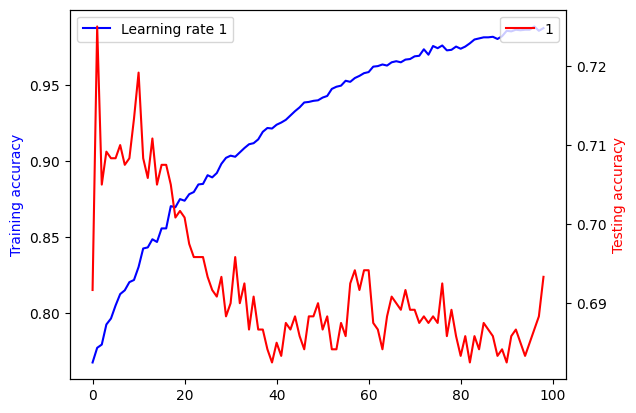

In [ ]:
get_accuracy_bag(X, y, Learning_rate_ = [1])

As you can see, as the number of classifiers increases so does the overfitting; the training accuracy increases and conversely, the testing accuracy decreases. One way to decrease overfitting is using the learning rate <code>learning_rate</code> with a default value of 1. This is a type of Regularization. For more detail on Regularization, check out <a href="https://hastie.su.domains/Papers/ESLII.pdf?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML241ENSkillsNetwork31576874-2022-01-01#page=383">here</a>.


$ \ $ 

$(10)$ We can now train the model, make a prediction, and calculate the accuracy. We see that by increasing the learning rate the test accuracy has improved.


In [ ]:
# creamos nuestro modelo clasificador AdaBoostClassifier tomando learning_rate = 0.7
model = AdaBoostClassifier(n_estimators = 100, random_state = 0, learning_rate = 0.7)

# entrenamos nuestro modelo clasificador
model.fit(X_train, y_train)

# predecimos un conjunto de datos con nuestro modelo entrenado
y_pred = model.predict(X_test)

In [ ]:
# mostramos la precision de nuestro modelo y se puede ver que este modelo tiene mejor precision que el anterior
get_accuracy(X_train, X_test, y_train, y_test, model)

{'test Accuracy': 0.75, 'train Accuracy': 0.95}

100%|██████████| 20/20 [02:30<00:00,  7.55s/it]


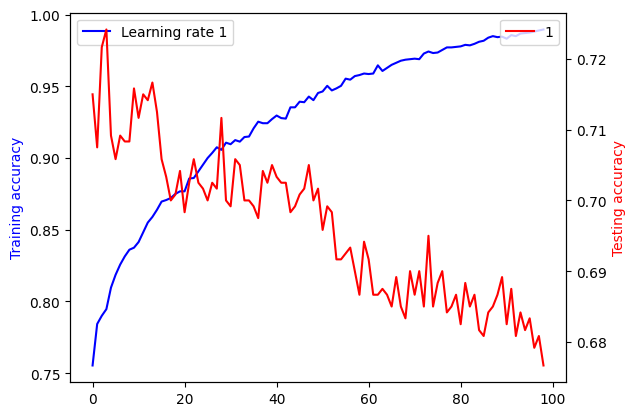

In [ ]:
get_accuracy_bag(X, y, Learning_rate_ = [1])

$ \ $

$(11)$ We can try different learning rates using the function <code>get_accuracy_bag</code>. In this case, the learning rates are $[0.2,0.4,0.6,1]$. As the learning rate goes down we see that the testing accuracy increases while conversely, the training accuracy decreases.

100%|██████████| 20/20 [10:17<00:00, 30.86s/it]


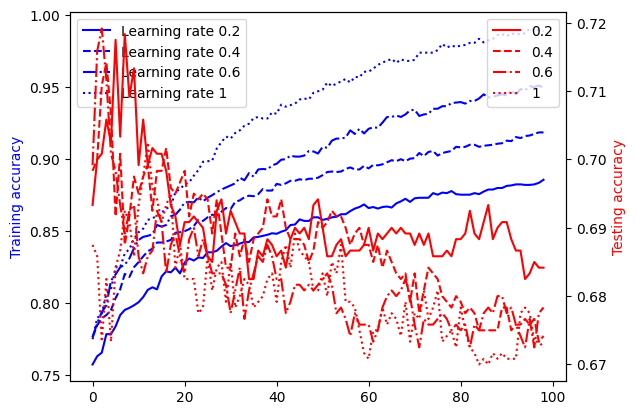

In [ ]:
get_accuracy_bag(X, y, Learning_rate_ = [0.2, 0.4, 0.6, 1])

Another important parameter is 

$$\color{aquamarine}{\text{algorithm}}$$

that takes on the values 

* ***SAMME***

* ***SAMME.R***

* The default is ***SAMME.R***. 

The ***SAMME.R*** algorithm typically converges faster than ***SAMME***, achieving a lower test error with fewer boosting iterations.

$ \ $

-----

## ***Details (algorithm parameter)***

For more details, check <a href="https://hastie.su.domains/Papers/samme.pdf?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML241ENSkillsNetwork31576874-2022-01-01">the paper</a>. One issue is that <code>SAMME.R</code> can't be used all the time as we will need the Base classifier to generate the probability of belonging to each class.


$ \ $

---

## ***Changing the Base Classifier***

$ \ $

AdaBoost is usually performed with Decision Trees but we can use other base classifiers. However, if the classifier is too strong it will cause overfitting. 

$ \ $

$(1)$ Consider using the following Support Vector Machine (SVM) as the base classifier.

In [ ]:
base_estimator = SVC(kernel = 'rbf', gamma = 1)

$ \ $

$(2)$ We see the SVM does extremely well.

In [ ]:
base_estimator.fit(X_train, y_train)

SVC(gamma=1)

In [ ]:
get_accuracy(X_train, X_test, y_train, y_test, base_estimator)

{'test Accuracy': 0.7666666666666667, 'train Accuracy': 1.0}

$ \ $

$(3)$ The Base classifier for SVM can not generate the probability of belonging to each class. If you uncomment the following line of code you will get an error.


In [ ]:
# base_estimator.predict_proba(X_train)

$ \ $

$(4)$ We will use the parameter <code>algorithm</code> =  <code>'SAMME'</code>.


In [ ]:
model = AdaBoostClassifier(n_estimators = 5, base_estimator = base_estimator, learning_rate = 1, algorithm = 'SAMME' )

$ \ $

$(5)$ We see the AdaBoost model does worse, this is similar to overfitting. In addition, ***SVM*** takes much longer to train than classification trees.

In [ ]:
# entrenamos nuestro modelo AdaBoostClassifier
model.fit(X_train, y_train)

# predecimos un conjunto de valores usando la data de prueba X_test en el modelo model creado anteriormente
y_pred = model.predict(X_test)

# obtenemos la precision de nuestro modelo comparando la data de prueba y la data de entrenamiento
get_accuracy(X_train, X_test, y_train, y_test, model)

{'test Accuracy': 0.7666666666666667, 'train Accuracy': 0.6857142857142857}

We see that each tree in RF is less correlated than Bagging.

$ \ $

----

## ***Cancer Data Example***

$ \ $

The example is based on a dataset that is publicly available from the UCI Machine Learning Repository (Asuncion and Newman, 2007) [http://mlearn.ics.uci.edu/MLRepository.html](http://mlearn.ics.uci.edu/MLRepository.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML241ENSkillsNetwork31576874-2022-01-01). The dataset consists of several hundred human cell sample records, each of which contains the values of a set of cell characteristics. 

$ \ $ 

$(1)$ Let's load the dataset.

In [ ]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv")
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


$ \ $

$(2)$ Let's remove rows that have a ***?*** in the <code>BareNuc</code> column.


In [ ]:
df["BareNuc"].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: BareNuc, dtype: int64

In [ ]:
df = df[df["BareNuc"] != "?"]
df

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


$ \ $

$(3)$ We obtain the features and the class labels.

In [ ]:
X =  df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
y = df['Class']

$ \ $

$(4)$ We split the data into training and testing sets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [ ]:
print('Train set:', X_train.shape,  y_train.shape)
print('Test set:', X_test.shape,  y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


$ \ $

$(5)$ We create a <code>AdaBoost</code> object and list the parameters using the method <code>get_params()</code>.


In [ ]:
# creamos el modelo clasificador AdaBoostClassifier
model = AdaBoostClassifier()

# obtenemos la lista de parametros que arroja el modelo clasificador
model.get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'estimator', 'learning_rate', 'n_estimators', 'random_state'])

$ \ $

$(6)$ We can use GridSearch for Exhaustive search over specified parameter values. We see many of the parameters are similar to Classification trees.

* Try different parameters for <code>learning_rate</code>, <code>n_estimators</code>, and <code>algorithm</code>.

* Create the Grid Search object and fit it.

In [ ]:
# creamos los parametros de la cuadricula
param_grid = {'learning_rate': [0.1*(n+1) for n in range(10)],
              'n_estimators' : [2*n+1 for n in range(10)],
              'algorithm':     ['SAMME', 'SAMME.R']} 

# Creamos el objeto Grid Search 
search = GridSearchCV(estimator = model, param_grid = param_grid,scoring = 'accuracy')

# entrenamos el modelo GridSearchCV
search.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.2, 0.30000000000000004, 0.4,
                                           0.5, 0.6000000000000001,
                                           0.7000000000000001, 0.8, 0.9, 1.0],
                         'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]},
             scoring='accuracy')

$ \ $

$(7)$ We can see the best accuracy score of the searched parameters was \~96%.


In [ ]:
search.best_score_

0.9689074228523771

$ \ $

$(8)$ The best parameter values are:

In [ ]:
search.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 17}

$ \ $

$(9)$ We calculate accuracy on the test data using the test data.


In [ ]:
get_accuracy(X_train, X_test, y_train, y_test, search.best_estimator_)

{'test Accuracy': 0.9708029197080292, 'train Accuracy': 0.9725274725274725}

$ \ $

----

## ***Practice***

Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications:

* Drug A, 

* Drug B,

* Drug C, 

* Drug x 

* Drug  y.

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The $\color{aquamarine}{\text{features}}$ of this dataset are:

* $\color{aquamarine}{\text{Age}}$, 

* $\color{aquamarine}{\text{Sex}}$, 

* $\color{aquamarine}{\text{Blood Pressure}}$,

* $\color{aquamarine}{\text{the Cholesterol of the patients}}$,

and the $\color{yellow}{\text{target}}$ is the $\color{yellow}{\text{drug}}$ that each patient responded to. It is a sample of multiclass classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe a drug to a new patient.

$ \ $

$(1)$ Let's load the dataset.


In [ ]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv", delimiter=",")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


$ \ $

$(2)$ Let's create the $X$ and $y$ for our dataset.


In [ ]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
y = df["Drug"] 

$ \ $

$(3)$ Now let's use a <code>LabelEncoder</code> to turn categorical features into numerical.


In [ ]:
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [ ]:
# creamos un codificador de etiquetas para la primera columna de X
le_sex = preprocessing.LabelEncoder()

# entrenamos nuestro codificador de etiquetas con ['F','M']
le_sex.fit(['F','M'])

# aplicamos nuestro modelo entrenado que funciona como una transformacion a la data X[:, 1]
X[:,1] = le_sex.transform(X[:, 1]) 

In [ ]:
# creamos un codificador de etiquetas para la segunda columna de X
le_BP = preprocessing.LabelEncoder()

# entrenamos nuestro codificador de etiquetas con ['LOW', 'NORMAL', 'HIGH']
le_BP.fit(['LOW', 'NORMAL', 'HIGH'])

# aplicamos nuestro modelo entrenado que funciona como una transformacion a la data X[:, 2]
X[:,2] = le_BP.transform(X[:, 2])

In [ ]:
# creamos un codificador de etiquetas para la tercera columna de X
le_Chol = preprocessing.LabelEncoder()

# entrenamos nuestro codificador de etiquetas con [ 'NORMAL', 'HIGH']
le_Chol.fit(['NORMAL', 'HIGH'])

# aplicamos nuestro modelo entrenado que funciona como una transformacion a la data X[:, 2]
X[:, 3] = le_Chol.transform(X[:, 3]) 

In [ ]:
X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

$ \ $

$(4)$ Split the data into training and testing data with a 80/20 split.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [ ]:
print('Train set:', X_train.shape,  y_train.shape)
print('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 5) (160,)
Test set: (40, 5) (40,)


$ \ $

$(5)$ Create ***GridSearchCV*** object called `search` with:

* `estimator` = ***model***, 

* <code>param_grid</code> = ***param_grid***, 

* <code>scoring</code> = ***accuracy***,

* <code>cv</code> $= 3$ 

and Fit the ***GridSearchCV*** object to our <code>X_train</code> and <code>y_train</code> data.

In [ ]:
# describimos los parametros de GridSearchCV
param_grid = {'learning_rate': [0.1*(n+1) for n in range(10)],
              'n_estimators' : [2*n+1 for n in range(10)],
              'algorithm':     ['SAMME', 'SAMME.R']}     

# creamos un modelo clasificador AdaBoostClassifier
model = AdaBoostClassifier()

# creamos un objeto GridSearchCV con los parametros establecidos
search = GridSearchCV(estimator = model, param_grid = param_grid, scoring = 'accuracy', cv = 3)

# entrenamos nuestro modelo con la data de entrenamiento X_train, y_train
search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.2, 0.30000000000000004, 0.4,
                                           0.5, 0.6000000000000001,
                                           0.7000000000000001, 0.8, 0.9, 1.0],
                         'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]},
             scoring='accuracy')

$ \ $

$(6)$ We can find the accuracy of the best model.

In [ ]:
search.best_score_

0.8625669694852084

$ \ $

$(7)$ We can find the best parameter values.

In [ ]:
search.best_params_

{'algorithm': 'SAMME', 'learning_rate': 0.9, 'n_estimators': 7}

$ \ $

$(8)$ We can find the accuracy test data.

In [ ]:
get_accuracy(X_train, X_test, y_train, y_test, search.best_estimator_)

{'test Accuracy': 0.775, 'train Accuracy': 0.85}